In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import keras
import glob

ModuleNotFoundError: No module named 'keras'

In [ ]:

from google.colab import drive
drive.mount('/docs')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /docs


In [ ]:

lang = {
    0: "EN",
    1: "DE",
    2: "IT"
}


from PIL import Image # used for loading images
import numpy as np
import os # used for navigating to image path
import imageio # used for writing images

 

def get_lang(path):
    lang = path.split('_')[0].split("/")[-1] 
    return lang.upper()
    
  

data_dir = '/docs/My Drive/docs/images'


files = glob.glob(data_dir + "/*.jpg")


dataset = []

for file in files: 
    cls = get_lang(file) 
    dataset.append( (file, cls) )
  
print(len(dataset))

934


In [ ]:
ret = get_lang( files[0] )
print(ret)

IT


In [ ]:
def lang_to_vec(lang):
    if lang == 'EN':
        return [1,0,0]
    if lang=='DE':
        return [0,1,0]
    if lang == 'IT':
        return [0,0,1]

      
      
features = []
labels = []
for idx, (path, label) in enumerate(dataset):
  
  
    img = Image.open(path)
    img = img.convert('L')
    
    
    area = (100, 100, 250,250)
    cropped_img = img.crop(area)
    
    features.append( np.array(cropped_img))
    labels.append( lang_to_vec(label))

    
    area = (200, 200, 350,350)
    cropped_img = img.crop(area)
    
    features.append( np.array(cropped_img))
    labels.append( lang_to_vec(label))
    
    
    area = (50, 50, 200,200)
    cropped_img = img.crop(area)
    
    features.append( np.array(cropped_img))
    labels.append( lang_to_vec(label))

    
    area = (150, 150, 300,300)
    cropped_img = img.crop(area)
    
    features.append( np.array(cropped_img))
    labels.append( lang_to_vec(label))

    
    
    area = (80, 80, 80+150,80+150)
    cropped_img = img.crop(area)
    
    features.append( np.array(cropped_img))
    labels.append( lang_to_vec(label))

    
    if label == 'IT':
        area = (30, 30, 30+150,30+150)
        cropped_img = img.crop(area)

        features.append( np.array(cropped_img))
        labels.append( lang_to_vec(label))
        
        
        area = (40, 70, 40+150,70+150)
        cropped_img = img.crop(area)

        features.append( np.array(cropped_img))
        labels.append( lang_to_vec(label))
        
        
        area = (130, 250, 130+150, 250+150)
        cropped_img = img.crop(area)

        features.append( np.array(cropped_img))
        labels.append( lang_to_vec(label))
        
        
           
        area = (250, 130, 250+150, 130+150)
        cropped_img = img.crop(area)

        features.append( np.array(cropped_img))
        labels.append( lang_to_vec(label))
        
        
              
        area = (200, 200, 200+150, 200+150)
        cropped_img = img.crop(area)

        features.append( np.array(cropped_img))
        labels.append( lang_to_vec(label))
        
        
                 
        area = (350, 350, 350+150, 350+150)
        cropped_img = img.crop(area)

        features.append( np.array(cropped_img))
        labels.append( lang_to_vec(label))
        
        
                     
        
        area = (360, 120, 360+150, 120+150)
        cropped_img = img.crop(area)

        features.append( np.array(cropped_img))
        labels.append( lang_to_vec(label))
        
        
        
        

    if idx % 100 == 0:
      print(idx)
    
    
features = np.array(features)
labels = np.array(labels)
 

labels.shape



0
100
200
300
400
500
600
700
800
900


(5608, 3)

In [ ]:
IMG_SIZE_X, IMG_SIZE_Y = features[0].shape
IMG_SIZE_X, IMG_SIZE_Y, labels.shape

scaled_features = features/255
  
mean_image = (scaled_features.sum(axis=0)/scaled_features.shape[0])
scaled_features = (scaled_features -  mean_image)
 


from sklearn.model_selection import  train_test_split 
trainImages = scaled_features.reshape(-1, IMG_SIZE_X, IMG_SIZE_Y, 1)



 


train_x, test_x, train_y, test_y = train_test_split( trainImages, labels, test_size=.2, random_state = 1231)

train_x.shape, train_y.shape, test_x.shape, test_y.shape

((4486, 150, 150, 1), (4486, 3), (1122, 150, 150, 1), (1122, 3))

In [ ]:
features.shape

(5608, 150, 150)

In [ ]:
np.min(trainImages), np.max(trainImages)

(-0.9118220469357501, 0.3662876562893346)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization, Flatten, Dense, Dropout,LeakyReLU, ReLU
from keras.callbacks import EarlyStopping

In [ ]:
def get_model():
  model = Sequential()
  
  model.add(Conv2D(16, kernel_size = (3, 3),input_shape=(IMG_SIZE_X, IMG_SIZE_Y, 1)))
  model.add( ReLU() )
  
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(BatchNormalization())


  model.add(Conv2D(32, kernel_size=(3,3)))
  model.add( ReLU() )
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(BatchNormalization())


  model.add(Conv2D(64, kernel_size=(3,3)))
  model.add( ReLU() )
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(BatchNormalization())

  model.add(Conv2D(96, kernel_size=(3,3)))
  model.add( ReLU() )
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(BatchNormalization())

  
  model.add(Conv2D(32, kernel_size=(3,3) ))
  model.add( ReLU() )
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(BatchNormalization()) 

  model.add(Dropout(0.7))
  model.add(Flatten())
  model.add(Dense(128))
  model.add( ReLU() )
  model.add(Dropout(0.7))

  model.add(Dense(3, activation = 'softmax'))
  return model

In [ ]:
model = get_model()

In [ ]:

optimizer=  keras.optimizers.Adam(lr=0.0003, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
from keras.metrics import categorical_accuracy
model.compile(loss='kullback_leibler_divergence', optimizer=optimizer, metrics = ["accuracy"]) 

In [ ]:
callbacks = [EarlyStopping(monitor='val_loss', patience=4)]
model.fit(train_x, train_y,epochs=100, validation_data=(test_x,test_y), callbacks=callbacks, batch_size = 64, shuffle=False) 

Train on 4486 samples, validate on 1122 samples
Epoch 1/100
4486/4486 [==============================] - 4s 980us/step - loss: 2.3699 - acc: 0.3611 - val_loss: 1.0894 - val_acc: 0.5160
Epoch 2/100
4486/4486 [==============================] - 3s 595us/step - loss: 1.9476 - acc: 0.4041 - val_loss: 1.0078 - val_acc: 0.5330
Epoch 3/100
4486/4486 [==============================] - 3s 596us/step - loss: 1.7586 - acc: 0.4262 - val_loss: 0.8904 - val_acc: 0.5838
Epoch 4/100
4486/4486 [==============================] - 3s 598us/step - loss: 1.4357 - acc: 0.4860 - val_loss: 0.8552 - val_acc: 0.5900
Epoch 5/100
4486/4486 [==============================] - 3s 604us/step - loss: 1.2789 - acc: 0.5214 - val_loss: 0.8095 - val_acc: 0.6185
Epoch 6/100
4486/4486 [==============================] - 3s 601us/step - loss: 1.1135 - acc: 0.5767 - val_loss: 0.7881 - val_acc: 0.6453
Epoch 7/100
4486/4486 [==============================] - 3s 614us/step - loss: 0.9459 - acc: 0.6277 - val_loss: 0.5945 - val_acc: 

In [ ]:
from sklearn.metrics import accuracy_score
preds = np.argmax( model.predict( test_x ), axis = 1)


accuracy_score( preds, np.argmax(test_y, axis=1))


0.9705882352941176

predicted language in text: IT


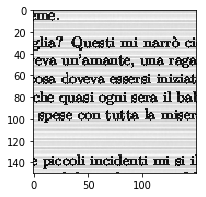

In [ ]:
idx = 6

im = test_x[idx].reshape(150,150)
plt.figure( figsize = (3,3))
plt.imshow(im, cmap="gray")

 
ret = model.predict( test_x[idx].reshape(1,150,150,1))
print( 'predicted language in text:', lang[ np.argmax(ret, axis = 1)[0] ] ) 

predicted language in text: EN


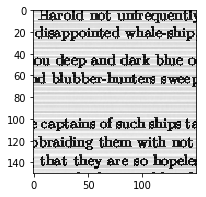

In [ ]:

idx = 134
im = test_x[idx].reshape(150,150)
plt.figure( figsize = (3,3))
plt.imshow(im, cmap="gray")

ret = model.predict( test_x[idx].reshape(1,150,150,1))
print( 'predicted language in text:', lang[ np.argmax(ret, axis = 1)[0] ] )




predicted language in text: DE


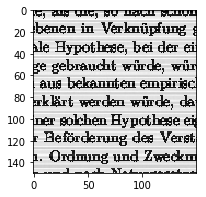

In [ ]:

idx = 10
im = test_x[idx].reshape(150,150)
plt.figure( figsize=(3,3))
plt.imshow(im, cmap="gray")
ret = model.predict( test_x[idx].reshape(1,150,150,1))
print( 'predicted language in text:', lang[ np.argmax(ret, axis = 1)[0] ] )


In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='/docs/My Drive/docs/images/model/model.png', show_layer_names=False)

In [ ]:
d

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
torch.__version__

'1.1.0'

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class LangDetector(nn.Module):
    def __init__(self):
        super(LangDetector, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3)
        
        self.fc1 = nn.Linear(128* 17*17, 128)
        self.fc2 = nn.Linear(128, 3)
        self.softmax =  nn.Softmax()
        #self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 128* 17*17)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        #x = self.fc3(x)
        return self.softmax(x)
      

net = LangDetector()

In [ ]:
BATCH_SIZE = 16
i =0
inputs =  torch.from_numpy( train_x[ i:(i+BATCH_SIZE), :].reshape(16,1,150,150).astype(np.float32)) 

labels = torch.from_numpy(train_y[ i:(i+BATCH_SIZE), :] )
ret= net.forward( inputs )
ret.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


torch.Size([16, 3])

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
torch.set_default_dtype(torch.float32)

train_x = train_x.astype(np.float32)

In [ ]:
tensor_train_x = torch.from_numpy( train_x.reshape( -1, 1, 150, 150) )

tensor_train_y=  torch.from_numpy( train_y.argmax(axis=1) )

tensor_train_x.shape,tensor_train_y.shape

(torch.Size([3736, 1, 150, 150]), torch.Size([3736]))

In [ ]:
i = 2
BATCH_SIZE=32
tensor_train_x[ i:(i+BATCH_SIZE), :].shape, tensor_train_y[ i:(i+BATCH_SIZE)]

(torch.Size([32, 1, 150, 150]), torch.Size([32]))

In [ ]:
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    BATCH_SIZE =128
    for i in range(0, train_x.shape[0], BATCH_SIZE):
       
        try:
          inputs =   tensor_train_x[ i:(i+BATCH_SIZE), :]
          labels =   tensor_train_y[ i:(i+BATCH_SIZE)]
        except:
          print("err in reshape")
    
        #print(inputs.shape, labels.shape)
        

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        
        
        loss = criterion(outputs,  labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        #if i % 100 == 0:    # print every 2000 mini-batches
        #    print('[%d, %5d] loss: %.3f' %
        #          (epoch + 1, i + 1, running_loss / 100))
        #    running_loss = 0.0
            
    print( "epoch loss=%s" % running_loss)

print('Finished Training')

In [ ]:
train_y[ i:(i+BATCH_SIZE), :].argmax(axis=1)

NameError: ignored

In [ ]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 16)      160       
_________________________________________________________________
re_lu_7 (ReLU)               (None, 148, 148, 16)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 74, 74, 16)        64        
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
re_lu_8 (ReLU)               (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
__________

In [ ]:
labels

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [ ]:
langs= np.argmax(labels, axis=1)
langs[langs==0].shape, langs[langs==1].shape, langs[langs==2].shape, 

((2090,), (1910,), (1608,))

In [ ]:
langs.shape

(5608,)